In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from functions import *


import make_dataset as m_d

In [2]:
###PRECIPITAZIONI


#Questo si comporta bene
#Non è utile importare i data availability tendenzialmente
colnames = ['time', 'NO_IDEA', 'intensity(?)']


dummy=m_d.safe_import('precip')
#Problema: il primo dato vien preso come dizionario
#Converto colonne
dummy=dummy.rename(columns={'201311010000': 'time', "2383": 'NO_IDEA', "1" : 'intensity(?)'})

#Riaggiungo il primo dato
precipitation=appforth(dummy,[201311010000,2383,1])

precipitation

Index(['201311010000', '2383', '1'], dtype='object')


,time,NO_IDEA,intensity(?)
0,201311010000,2383,1
1,201311010020,9452,1
2,201311010020,8278,1
3,201311010020,6871,2
4,201311010020,5689,3
...,...,...,...
3489412,201312260610,745,1
3489413,201312260610,506,1
3489414,201312260610,389,1
3489415,201312260610,393,1


Index(['COD_RIP', 'COD_REG', 'COD_PROV', 'PRO_COM', 'PRO_COM_T', 'COMUNE',
       'COMUNE_A', 'CC_P', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


,COD_RIP,COD_REG,COD_PROV,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_P,Shape_Leng,Shape_Area,geometry
0,1,1,1,1169,001169,Novalesa,None,0,24774.650175,2.855420e+07,"POLYGON ((347021.993 5009818.761, 347042.993 5..."
1,1,1,1,1170,001170,Oglianico,None,0,17006.830647,6.302986e+06,"MULTIPOLYGON (((397768.830 5022935.180, 397883..."
2,1,1,1,1174,001174,Osasio,None,0,13270.436002,4.577087e+06,"POLYGON ((390133.431 4971487.567, 390128.493 4..."
3,1,1,1,1180,001180,Pavarolo,None,0,11459.747350,4.405612e+06,"POLYGON ((408164.103 4993403.404, 408166.884 4..."
4,1,1,1,1181,001181,Pavone Canavese,None,0,18011.757977,1.154000e+07,"POLYGON ((410911.010 5033344.106, 410995.760 5..."


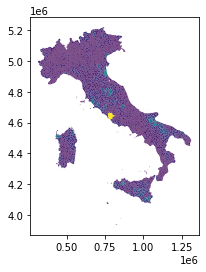

In [3]:

adm_reg=m_d.safe_import('regions')

adm_reg.plot("Shape_Area")
adm_reg.head(5)


<AxesSubplot:>

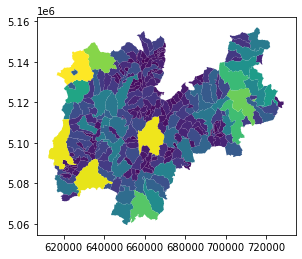

In [4]:
#Convertiamo alla vera patria
adm_reg=adm_reg[adm_reg["COD_PROV"]==22]
adm_reg.plot("Shape_Area")